In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.3 MB 10.7 MB/s            
     |████████████████████████████████| 1.6 MB 137.5 MB/s            
     |████████████████████████████████| 321 kB 143.0 MB/s            
     |████████████████████████████████| 4.6 MB 108.2 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 10.9 MB/s            


In [1]:
import pandas as pd
# df_transformed is  our input for the model
df_transformed_path = "structured_diagnosis"
df_transformed = pd.read_csv(df_transformed_path)
#drop nan diagnosis
df_transformed = df_transformed.dropna(subset=['discharge_diag'])

#df_output is the output from model
df_output_path = "structured_diagnosis_mappings"
df_output = pd.read_csv(df_output_path)

#drop nan diagnosis
df_output = df_output[df_output['Diagnosis'] != "NaN"]
df_output = df_output.dropna(subset=['Diagnosis'])

Unique Patients (df_transformed): 145219
Unique Patients (df_output): 142468
Unique Diagnosis Concepts (df_transformed): 405158
Unique Diagnosis Concepts (df_output): 372339
Total Diagnosis Concepts (df_transformed): 1078656
Total Diagnosis Concepts (df_output): 1015591


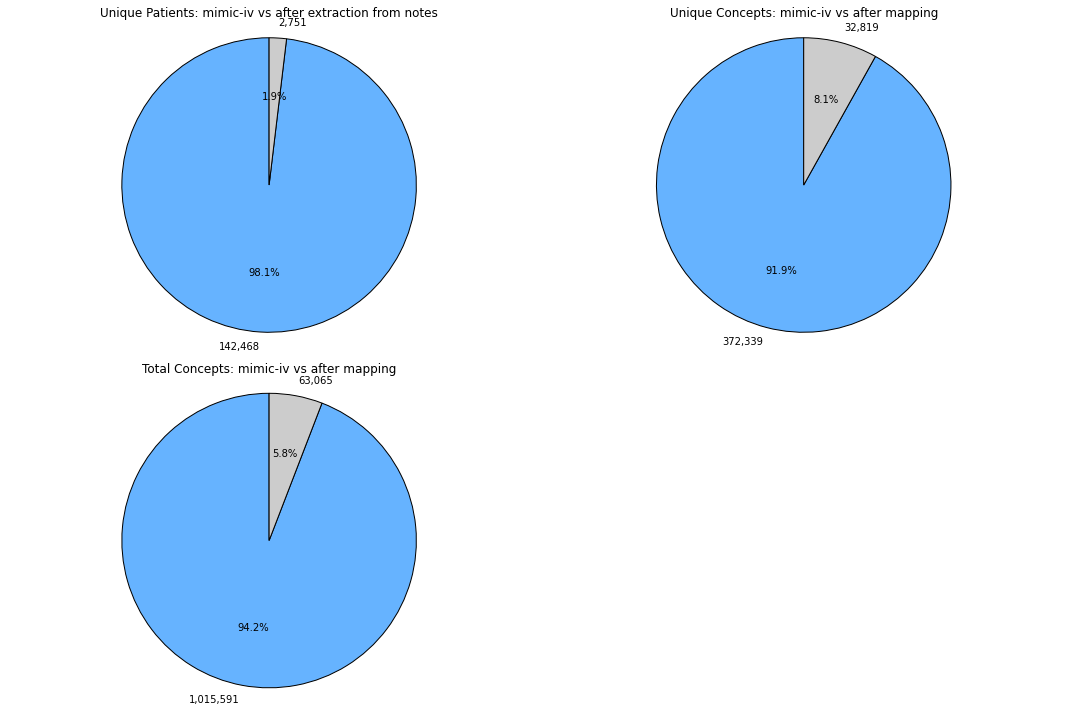

In [2]:
#concept and patient stats
import matplotlib.pyplot as plt

# Calculate the values
unique_patients_transformed = df_transformed['subject_id'].nunique()
unique_patients_output = df_output['Subject_ID'].nunique()

unique_concepts_transformed = df_transformed['discharge_diag'].nunique()
unique_concepts_output = df_output['Diagnosis'].nunique()

total_concepts_transformed = df_transformed['discharge_diag'].count()
total_concepts_output = df_output['Diagnosis'].count()

# Display calculated values
print(f"Unique Patients (df_transformed): {unique_patients_transformed}")
print(f"Unique Patients (df_output): {unique_patients_output}")
print(f"Unique Diagnosis Concepts (df_transformed): {unique_concepts_transformed}")
print(f"Unique Diagnosis Concepts (df_output): {unique_concepts_output}")
print(f"Total Diagnosis Concepts (df_transformed): {total_concepts_transformed}")
print(f"Total Diagnosis Concepts (df_output): {total_concepts_output}")

# Function to create pie charts without specific labels
def create_pie_chart(title, total_value, output_value):
    sizes = [output_value, total_value - output_value]
    colors = ['#66b3ff', '#cccccc']
    plt.pie(sizes, labels=[f'{output_value:,}', f'{total_value - output_value:,}'], colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plot pie charts for each category
plt.figure(figsize=(15, 10))

# Unique Patients
plt.subplot(2, 2, 1)
create_pie_chart('Unique Patients: mimic-iv vs after extraction from notes', unique_patients_transformed, unique_patients_output)

# Unique Concepts
plt.subplot(2, 2, 2)
create_pie_chart('Unique Concepts: mimic-iv vs after mapping', unique_concepts_transformed, unique_concepts_output)

# Total Concepts
plt.subplot(2, 2, 3)
create_pie_chart('Total Concepts: mimic-iv vs after mapping', total_concepts_transformed, total_concepts_output)

plt.tight_layout()
plt.show()


Total non-NaN UMLS_CUI: 1015591
Total ICD10 or ICD10CM codes: 529580
Total SNOMEDCT_US codes: 376519
Total non-NaN UMLS_CUI: 1015591
Total ICD10 or ICD10CM codes: 529580
Total SNOMEDCT_US codes: 376519
Remaining (No ICD10/SNOMEDCT codes, only UMLS CUIs): 109492
Total unique Subject_IDs for ICD10/ICD10CM: 114501
Total unique Subject_IDs for SNOMEDCT_US: 23933


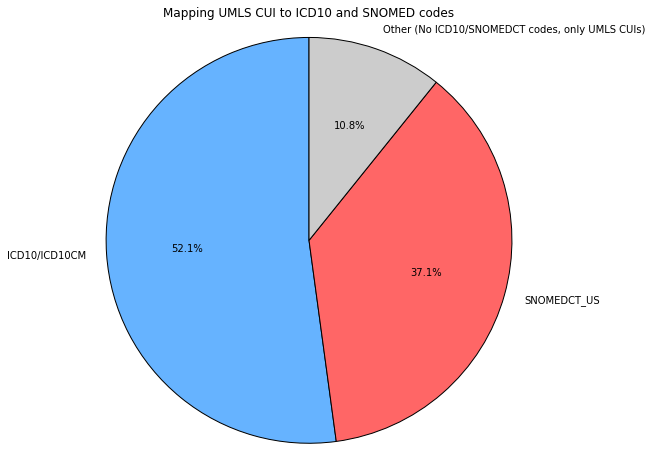

In [3]:
#total umls cuis, icd codes, snomed
df_output.head(5)

# Count non-NaN values in UMLS_CUI column
non_nan_umls_cui_count = df_output['UMLS_CUI'].notna().sum()

# Count occurrences where 'code' is in ('ICD10', 'ICD10CM')
icd10_count = df_output[df_output['sab'].isin(['ICD10', 'ICD10CM'])].shape[0]

# Count occurrences where 'code' is 'SNOMEDCT_US'
snomedct_us_count = df_output[df_output['sab'] == 'SNOMEDCT_US'].shape[0]

# Display the results
print(f"Total non-NaN UMLS_CUI: {non_nan_umls_cui_count}")
print(f"Total ICD10 or ICD10CM codes: {icd10_count}")
print(f"Total SNOMEDCT_US codes: {snomedct_us_count}")
# Count unique Subject_IDs for rows where 'sab' is in ('ICD10', 'ICD10CM')
unique_subject_ids_icd10 = df_output[df_output['sab'].isin(['ICD10', 'ICD10CM'])]['Subject_ID'].nunique()
snomed_only_subjects = df_output.loc[
    df_output['Subject_ID'].isin(
        df_output.loc[df_output['sab'] == 'SNOMEDCT_US', 'Subject_ID']
    ) & 
    ~df_output['Subject_ID'].isin(
        df_output.loc[df_output['sab'].isin(['ICD10', 'ICD10CM']), 'Subject_ID']
    ),
    'Subject_ID'
].nunique()

# Calculate the remaining portion (NaN or other codes)
remaining_count = non_nan_umls_cui_count - (icd10_count + snomedct_us_count)

# Display the counts
print(f"Total non-NaN UMLS_CUI: {non_nan_umls_cui_count}")
print(f"Total ICD10 or ICD10CM codes: {icd10_count}")
print(f"Total SNOMEDCT_US codes: {snomedct_us_count}")
print(f"Remaining (No ICD10/SNOMEDCT codes, only UMLS CUIs): {remaining_count}")
print(f"Total unique Subject_IDs for ICD10/ICD10CM: {unique_subject_ids_icd10}")
print(f"Total unique Subject_IDs for SNOMEDCT_US: {snomed_only_subjects}")

# Labels and colors for the pie chart
labels = ['ICD10/ICD10CM', 'SNOMEDCT_US', 'Other (No ICD10/SNOMEDCT codes, only UMLS CUIs)']
sizes = [icd10_count, snomedct_us_count, remaining_count]
colors = ['#66b3ff', '#ff6666', '#cccccc']  # Customizable colors

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Mapping UMLS CUI to ICD10 and SNOMED codes')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [4]:
#compare with mimic iv
df_output.head(5)

,Unnamed: 0,Subject_ID,hadm_id,Diagnosis,UMLS_CUI,UMLS_Name,Score,code,str,tty,sab
0,0,10000032,22595853,Ascites from Portal HTN,C0003962,Ascites,0.988981,R18,Ascites,AB,ICD10CM
1,17,10000032,22841357,"HCV cirrhosis, HIV, hyponatremia, COPD",C0020625,Hyponatremia,0.989849,E87.1,Sodium [Na] deficiency,ET,ICD10CM
2,5,10000032,22841357,diuretic refractory ascites,C0003962,Ascites,0.988981,R18,Ascites,AB,ICD10CM
3,46,10000032,25742920,Decompensated HCV cirrhosis,C0205434,Decompensated,0.972250,5650002,Decompensated,PT,SNOMEDCT_US
4,53,10000032,25742920,Hyponatremia,C0020625,Hyponatremia,0.989849,E87.1,Sodium [Na] deficiency,ET,ICD10CM


In [5]:
# file path to diagnosis file
file_path = '/data0/mimiciv/0.4/hosp/diagnoses_icd.csv.gz'

# Reading the gzipped CSV file directly into a DataFrame
mimic_diagnosis = pd.read_csv(file_path, compression='gzip')

# Display the first few rows
mimic_diagnosis.head(10)


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,11603789,25552978,3,65801,9
1,11603789,25552978,4,64881,9
2,11603789,25552978,5,V270,9
3,11603789,25552978,1,65221,9
4,11603789,25552978,2,64421,9
5,16809467,29803749,4,66982,9
6,16809467,29803749,1,64511,9
7,16809467,29803749,2,64811,9
8,16809467,29803749,5,V270,9
9,16809467,29803749,3,2449,9


In [6]:
#prep--> converting the mimic-iv icd9 to icd 10

# Step 1: Prepare crosswalk_df
crosswalk_df = pd.read_csv("icd9_to_10.csv")

# Remove periods from the 'code' column
crosswalk_df_updated = crosswalk_df.copy()
crosswalk_df_updated['source_code'] = crosswalk_df_updated['source_code'].str.replace('.', '', regex=False)
crosswalk_df_updated['target_code'] = crosswalk_df_updated['target_code'].str.replace('.', '', regex=False)

mimic_diagnosis['icd_code'] = mimic_diagnosis['icd_code'].astype(str)
crosswalk_df_updated['source_code'] = crosswalk_df_updated['source_code'].astype(str)
mimic_diagnosis['icd_code'] = mimic_diagnosis['icd_code'].str.strip()
crosswalk_df_updated['source_code'] = crosswalk_df_updated['source_code'].str.strip()

mimic_diagnosis = mimic_diagnosis.merge(crosswalk_df_updated, 
                                        left_on='icd_code', 
                                        right_on='source_code', 
                                        how='left')
# Step 3: Replace icd_code with target_code where merged, else keep original icd_code
mimic_diagnosis['icd_code'] = mimic_diagnosis['target_code'].fillna(mimic_diagnosis['icd_code'])

# Update icd_version to '10_cw' where target_code was used
mimic_diagnosis.loc[mimic_diagnosis['target_code'].notna(), 'icd_version'] = '10_cw'

mimic_diagnosis = mimic_diagnosis[['subject_id', 'hadm_id', 'seq_num', 'icd_code', 'icd_version']]

unique_subjects = mimic_diagnosis['subject_id'].nunique()
total_unique_subjects = mimic_diagnosis['subject_id'].nunique()
print(f"Unique subject IDs: {unique_subjects}")


mimic_diagnosis['icd_version'] = mimic_diagnosis['icd_version'].apply(lambda x: str(x).strip() if x is not None else '')
mimic_diagnosis = mimic_diagnosis[mimic_diagnosis['icd_version'].isin(['10', '10_cw'])]

unique_subjects = mimic_diagnosis['subject_id'].nunique()
print(f"Unique subject IDs with only ICD10: {unique_subjects}")

mimic_diagnosis.head()


/tmp/ipykernel_3843185/3941686223.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10_cw' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mimic_diagnosis.loc[mimic_diagnosis['target_code'].notna(), 'icd_version'] = '10_cw'


Unique subject IDs: 221122
Unique subject IDs with only ICD10: 218593


,subject_id,hadm_id,seq_num,icd_code,icd_version
0,11603789,25552978,3,O410,10_cw
1,11603789,25552978,4,O99810,10_cw
2,11603789,25552978,5,Z370,10_cw
3,11603789,25552978,1,O321XX0,10_cw
4,11603789,25552978,2,O601,10_cw


221122
218593


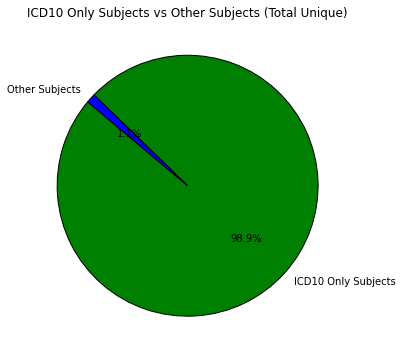

In [7]:
print(total_unique_subjects)
print(unique_subjects)

# Define labels and values for the total vs. ICD10 only
labels = ['ICD10 Only Subjects', 'Other Subjects']
values = [unique_subjects, total_unique_subjects - unique_subjects]  # Remaining subjects

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'blue'], wedgeprops={'edgecolor': 'black'})

# Title
plt.title('ICD10 Only Subjects vs Other Subjects (Total Unique)')
plt.show()

In [8]:
#FROM df_output, WE WANT TO USE ONLY icd10 codes and strip them of the period

# Filter rows where 'sab' is 'ICD10CM' or 'ICD10'
df_output_filtered = df_output[df_output['sab'].isin(['ICD10CM', 'ICD10'])]

# Remove periods from the 'code' column
df_output_updated = df_output_filtered.copy()
df_output_updated['code'] = df_output_updated['code'].str.replace('.', '', regex=False)

# Get total counts and unique Subject_ID counts
total_rows = df_output_updated.shape[0]
unique_subject_ids = df_output_updated['Subject_ID'].nunique()

print(f"Total rows: {total_rows}")
print(f"Unique Subject_IDs: {unique_subject_ids}")

df_output_updated.head()

Total rows: 529580
Unique Subject_IDs: 114501


,Unnamed: 0,Subject_ID,hadm_id,Diagnosis,UMLS_CUI,UMLS_Name,Score,code,str,tty,sab
0,0,10000032,22595853,Ascites from Portal HTN,C0003962,Ascites,0.988981,R18,Ascites,AB,ICD10CM
1,17,10000032,22841357,"HCV cirrhosis, HIV, hyponatremia, COPD",C0020625,Hyponatremia,0.989849,E871,Sodium [Na] deficiency,ET,ICD10CM
2,5,10000032,22841357,diuretic refractory ascites,C0003962,Ascites,0.988981,R18,Ascites,AB,ICD10CM
4,53,10000032,25742920,Hyponatremia,C0020625,Hyponatremia,0.989849,E871,Sodium [Na] deficiency,ET,ICD10CM
5,30,10000032,29079034,Acute Kidney Injury,C0022660,"Kidney Failure, Acute",0.975594,N179,"Acute kidney failure, unspecified",PT,ICD10CM


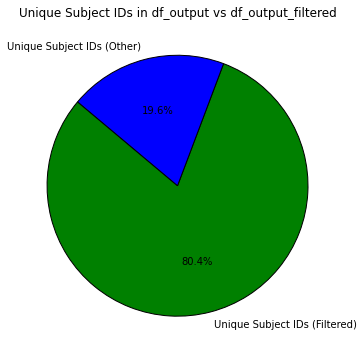

In [9]:
# Calculate the total unique subject IDs in both dataframes
total_unique_subjects_output = df_output['Subject_ID'].nunique()  # Unique IDs in df_output
unique_subjects_filtered = df_output_filtered['Subject_ID'].nunique()  # Unique IDs in df_output_filtered

# Labels and values for pie chart
labels = ['Unique Subject IDs (Filtered)', 'Unique Subject IDs (Other)']
values = [unique_subjects_filtered, total_unique_subjects_output - unique_subjects_filtered]  # The rest

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'blue'], wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Unique Subject IDs in df_output vs df_output_filtered')
plt.show()

In [11]:
#scatter plot for type of diagnosis predictions by model. dont do the above step to do this. the above converts codes to list. so instead skip that

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Keep individual rows for ICD codes (without grouping into lists)
df_output_codes = df_output_updated[['Subject_ID', 'code']].drop_duplicates()
mimic_codes = mimic_diagnosis[['subject_id', 'icd_code', 'seq_num']].drop_duplicates()  # Include seq_num early

# Merge on Subject_ID and ICD Code directly (no lists)
merged_df = pd.merge(df_output_codes, mimic_codes, 
                     left_on=['Subject_ID', 'code'], 
                     right_on=['subject_id', 'icd_code'], 
                     how='inner')

print("Merge complete")

# Extract only the relevant columns
final_merged_df = merged_df[['Subject_ID', 'code', 'subject_id', 'icd_code', 'seq_num']]

# **Keep only the row with the minimum seq_num for each unique Subject_ID**
final_merged_df = final_merged_df.loc[final_merged_df.groupby('Subject_ID')['seq_num'].idxmin()]

# **Cap seq_num at 15: If seq_num > 15, set it to 15**
final_merged_df['seq_num'] = final_merged_df['seq_num'].apply(lambda x: min(x, 15))

# Save to CSV
file_path = 'final_merged_output_seq_num_min_seq_capped.csv'
final_merged_df.to_csv(file_path, index=False)
print(f"DataFrame successfully exported to {file_path}")

# Compute counts of unique Subject_IDs per seq_num for plotting
seq_counts = final_merged_df.groupby('seq_num')['Subject_ID'].nunique().reset_index()
seq_counts = seq_counts.sort_values(by='seq_num', ascending=True)  # Ensure correct order

# **Calculate total unique matched patients**
total_unique_subjects = final_merged_df['Subject_ID'].nunique()

# **Compute proportion of patients per seq_num**
seq_counts['total_matched_patients'] = total_unique_subjects
seq_counts['proportion'] = seq_counts['Subject_ID'] / total_unique_subjects

# Print counts for verification
print(seq_counts)


Merge complete
DataFrame successfully exported to final_merged_output_seq_num_min_seq_capped.csv
    seq_num  Subject_ID  total_matched_patients  proportion
0         1       24574                   59742    0.411335
1         2       10249                   59742    0.171554
2         3        6649                   59742    0.111295
3         4        4519                   59742    0.075642
4         5        3282                   59742    0.054936
5         6        2422                   59742    0.040541
6         7        1810                   59742    0.030297
7         8        1417                   59742    0.023719
8         9        1111                   59742    0.018597
9        10         829                   59742    0.013876
10       11         608                   59742    0.010177
11       12         490                   59742    0.008202
12       13         401                   59742    0.006712
13       14         293                   59742    0.004904
14 

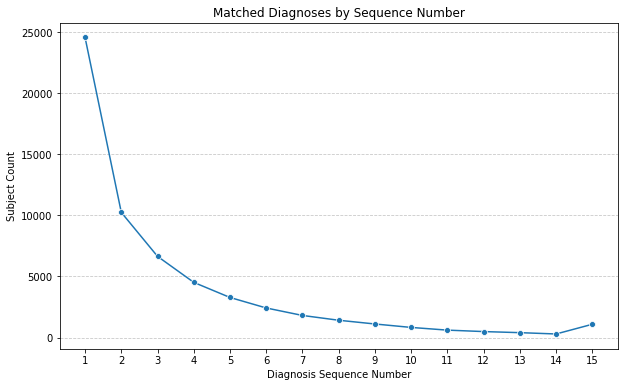

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Use lineplot to correctly show subject counts
sns.lineplot(data=seq_counts, x="seq_num", y="Subject_ID", marker='o')

plt.xlabel("Diagnosis Sequence Number")
plt.ylabel("Subject Count")  # Correct y-axis label
plt.title("Matched Diagnoses by Sequence Number")

plt.xticks(range(1, 16))  # Restrict x-axis to 1-15
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()




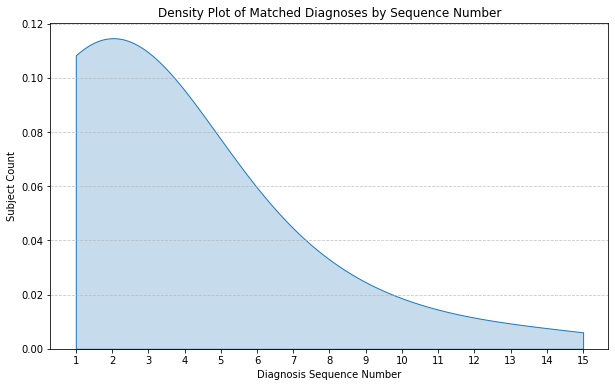

In [13]:
plt.figure(figsize=(10, 6))

# Use weights to reflect actual subject counts
sns.kdeplot(data=seq_counts, x="seq_num", weights=seq_counts["Subject_ID"], 
            fill=True, bw_adjust=1, clip=(1, 15))  

plt.xlabel("Diagnosis Sequence Number")
plt.ylabel("Subject Count")  # Now showing actual counts
plt.title("Density Plot of Matched Diagnoses by Sequence Number")

plt.xticks(range(1, 16))  # Restrict x-axis to 1-15
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



In [14]:
#compare the total match

# Create a list of unique codes for each subject_id in df_output_updated
df_output_codes = df_output_updated.groupby('Subject_ID')['code'].apply(lambda x: list(set(x))).reset_index()

# Create a list of unique icd_codes for each subject_id in mimic_diagnosis
mimic_codes = mimic_diagnosis.groupby('subject_id')['icd_code'].apply(lambda x: list(set(x))).reset_index()

# Merge the two dataframes on subject_id
merged_df = pd.merge(df_output_codes, mimic_codes, left_on='Subject_ID', right_on='subject_id', how='inner')

# Function to find matches between two lists of codes
def find_matches(row):
    return list(set(row['code']).intersection(set(row['icd_code'])))

# Apply the function to create a new column with matched codes
merged_df['matched_icd_code'] = merged_df.apply(find_matches, axis=1)




In [15]:
merged_df.head(10)

,Subject_ID,code,subject_id,icd_code,matched_icd_code
0,10000032,"[N179, K7460, J449, R18, I959, E875, E871]",10000032,"[I95, J449, R64, Z66, F431, Z21, D696, E871, Z...","[E875, E871, J449]"
1,10000084,[F03],10000084,"[R609, R441, E785, Z8546, R4182, F0280, R296, ...",[]
2,10000117,"[K21, R1310]",10000117,"[R0989, M810, R1310, K31819, F419, E7800, I341...",[R1310]
3,10000248,[D66],10000248,"[V00311, D649, Y92410, S0093, S301]",[]
4,10000764,"[R040, S022]",10000764,"[I10-I16, I214, N179, Z7902, B953, D696, I252,...",[R040]
5,10000826,"[K701, R18, K766]",10000826,"[F1020, D539, K766, K5909, E46, J918, D696, K7...",[K766]
6,10000883,"[F419, F32A]",10000883,"[F438, F332]",[]
7,10000935,[R110],10000935,"[Z791, Z66, R112, D638, M545, E78, Z9049, Z684...",[]
8,10000980,"[J449, E785, N189, E11, I639, I2510, I509, E14...",10000980,"[I5032, J449, K2970, E785, I2542, R0789, Z6832...","[J449, E785, I2510]"
9,10001176,[E11],10001176,"[I10-I16, B953, R112, R911, R740, I2510, I252,...",[]


Total rows in the inner join: 102539
Unique subject_ids in the inner join: 102539
Count of rows with non-empty matched_icd_code: 59742


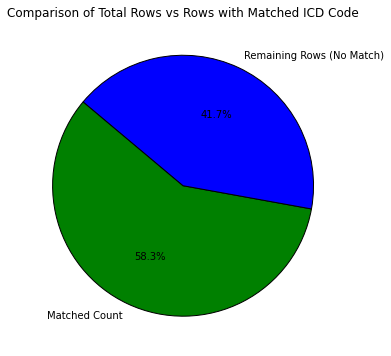

In [13]:
total_rows = merged_df.shape[0]  # Get total number of rows
unique_subject_ids = merged_df['Subject_ID'].nunique()  # Get count of unique subject_ids
matched_count = merged_df[merged_df['matched_icd_code'].apply(lambda x: len(x) > 0)].shape[0]
print(f"Total rows in the inner join: {total_rows}")
print(f"Unique subject_ids in the inner join: {unique_subject_ids}")
print(f"Count of rows with non-empty matched_icd_code: {matched_count}")

# Labels and values for pie chart
labels = ['Matched Count', 'Remaining Rows (No Match)']
values = [matched_count, total_rows - matched_count]  # Remaining rows that don't have matches

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'blue'], wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Comparison of Total Rows vs Rows with Matched ICD Code')
plt.show()
